In [41]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.patches import Arc
import numpy as np
from matplotlib import collections  as mc


In [102]:
phi = (1+5**.5)/2
length= 2/(1+phi**2)**.5
print("base length=",length)

base length= 1.0514622242382672


||AB||= 1.0514622242382672
Angle between A and B: 63.43494882292201


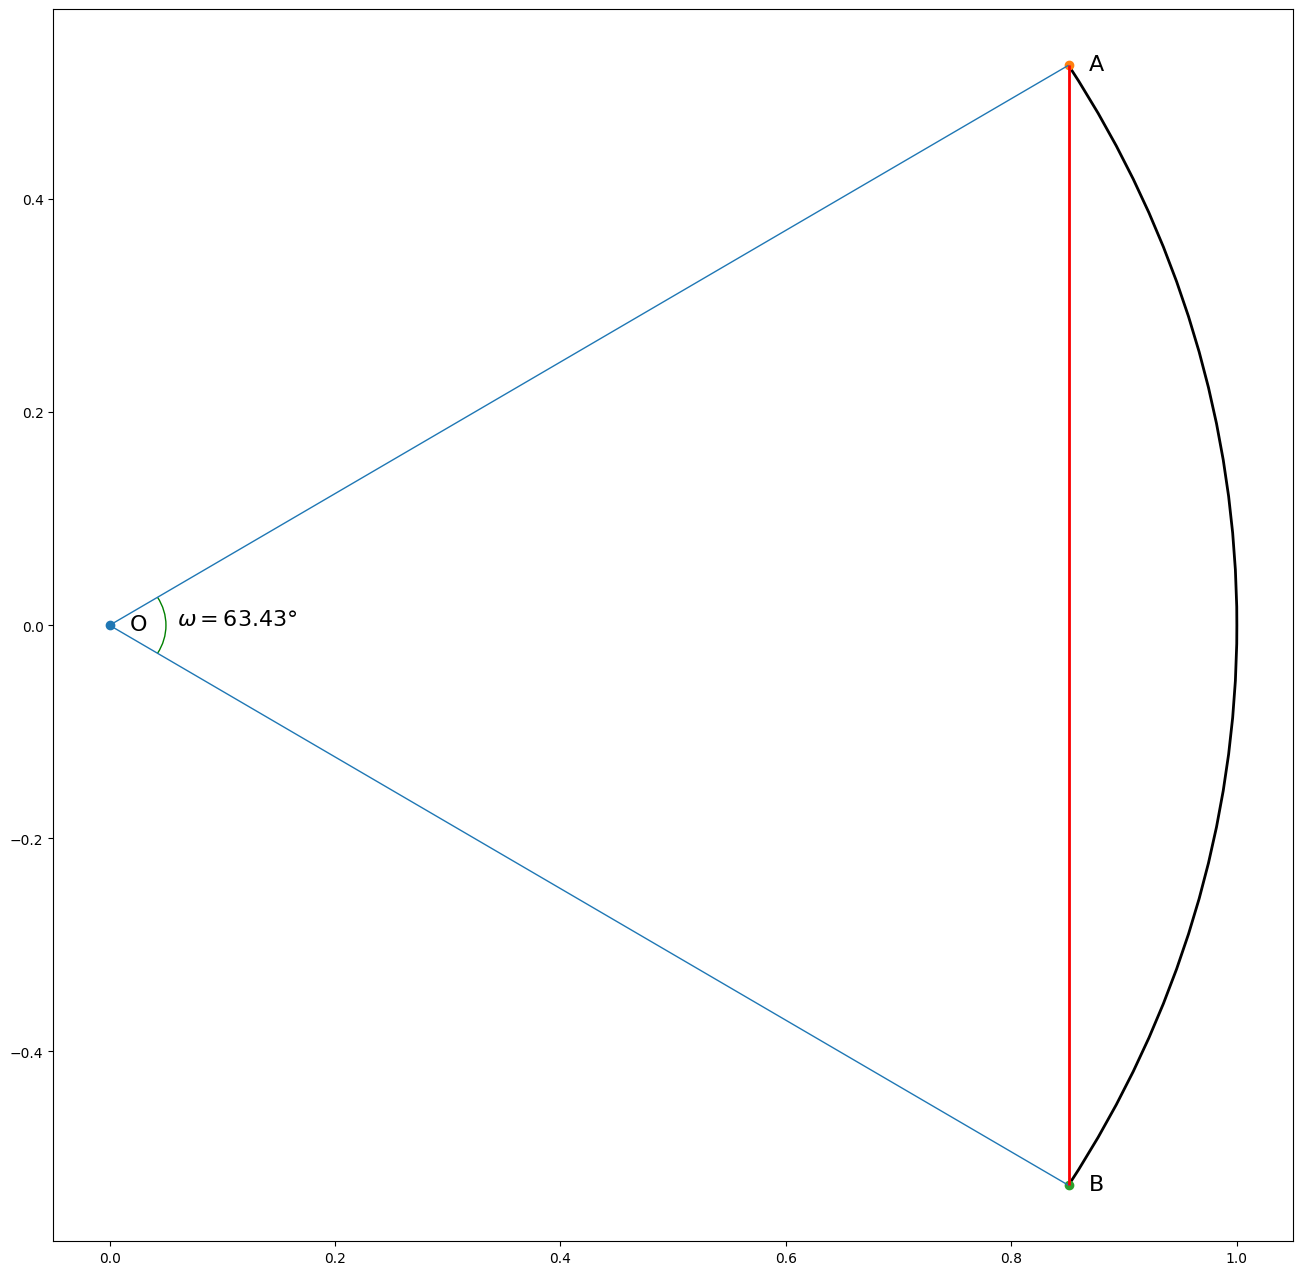

In [129]:
phi = (1+5**.5)/2
O = np.array([0,0.])
A = np.array([phi, 1])
B = np.array([phi, -1])
#for p in [A,B]:
#    print("Norm:", np.linalg.norm(p))
A = A/ (1+phi**2)**.5
B = B/ (1+phi**2)**.5
#for p in [A,B]:
#    print("Norm:", np.linalg.norm(p))
print("||AB||=",np.linalg.norm(A-B))
plt.figure(figsize=(16, 16))
omega = np.arccos(np.dot(A, B))
print("Angle between A and B:", omega/np.pi*180)
A_theta = np.arcsin(A[1])/np.pi*180
B_theta = np.arcsin(B[1])/np.pi*180
ax = plt.gca()
#print(A_theta,B_theta)
for p,l in [(O,"O"),(A,"A"),(B,"B")]:
    ax.scatter(*p)
    ax.annotate(l, p, fontsize=16, xytext=(20, -5), textcoords='offset pixels')
arc_element = Arc((0, 0), 2, 2, theta1=B_theta, theta2=A_theta, linewidth=2, zorder=0,
                color="k")
ax.add_patch(arc_element)
arc_element = Arc((0, 0), 0.1, 0.1, theta1=B_theta, theta2=A_theta, linewidth=1, zorder=0,
                color="g")
ax.annotate(rf"$\omega={omega/np.pi*180:.2f}\degree$",(0.06,0.),fontsize=16)
# Add the court elements onto the axes<
ax.add_patch(arc_element)
ax.add_collection(mc.LineCollection([[O,A],[O,B], [A,B]],linewidths=1))
ax.add_collection(mc.LineCollection([[A,B]],colors="r",linewidths=2))
#plt.xlim(-0.5, 1.5)
#plt.ylim(-0.8, 0.8)
plt.show()

In [147]:
def annotate_distances(ax,points,offset=None):
    offset = offset or [0,0]
    dists = np.linalg.norm(points[1:]-points[:-1],axis=-1)
    for i in range(points.shape[0]-1):
        p = (points[i] + points[i+1])/2
        ax.annotate(rf"$={dists[i]:.2f}$",p + offset,fontsize=16)

In [148]:
alphas = np.arange(1,5)/5
hat_AB = B[None,:]*alphas[:,None] + A[None,:]*(1-alphas)[:,None]
AB = hat_AB / np.linalg.norm(hat_AB,axis=-1,keepdims=True)
new_points = np.r_[A[None,:],AB,B[None,:]]
hat_new_points = np.r_[A[None,:],hat_AB,B[None,:]]

31.717474411461005 -31.717474411461005


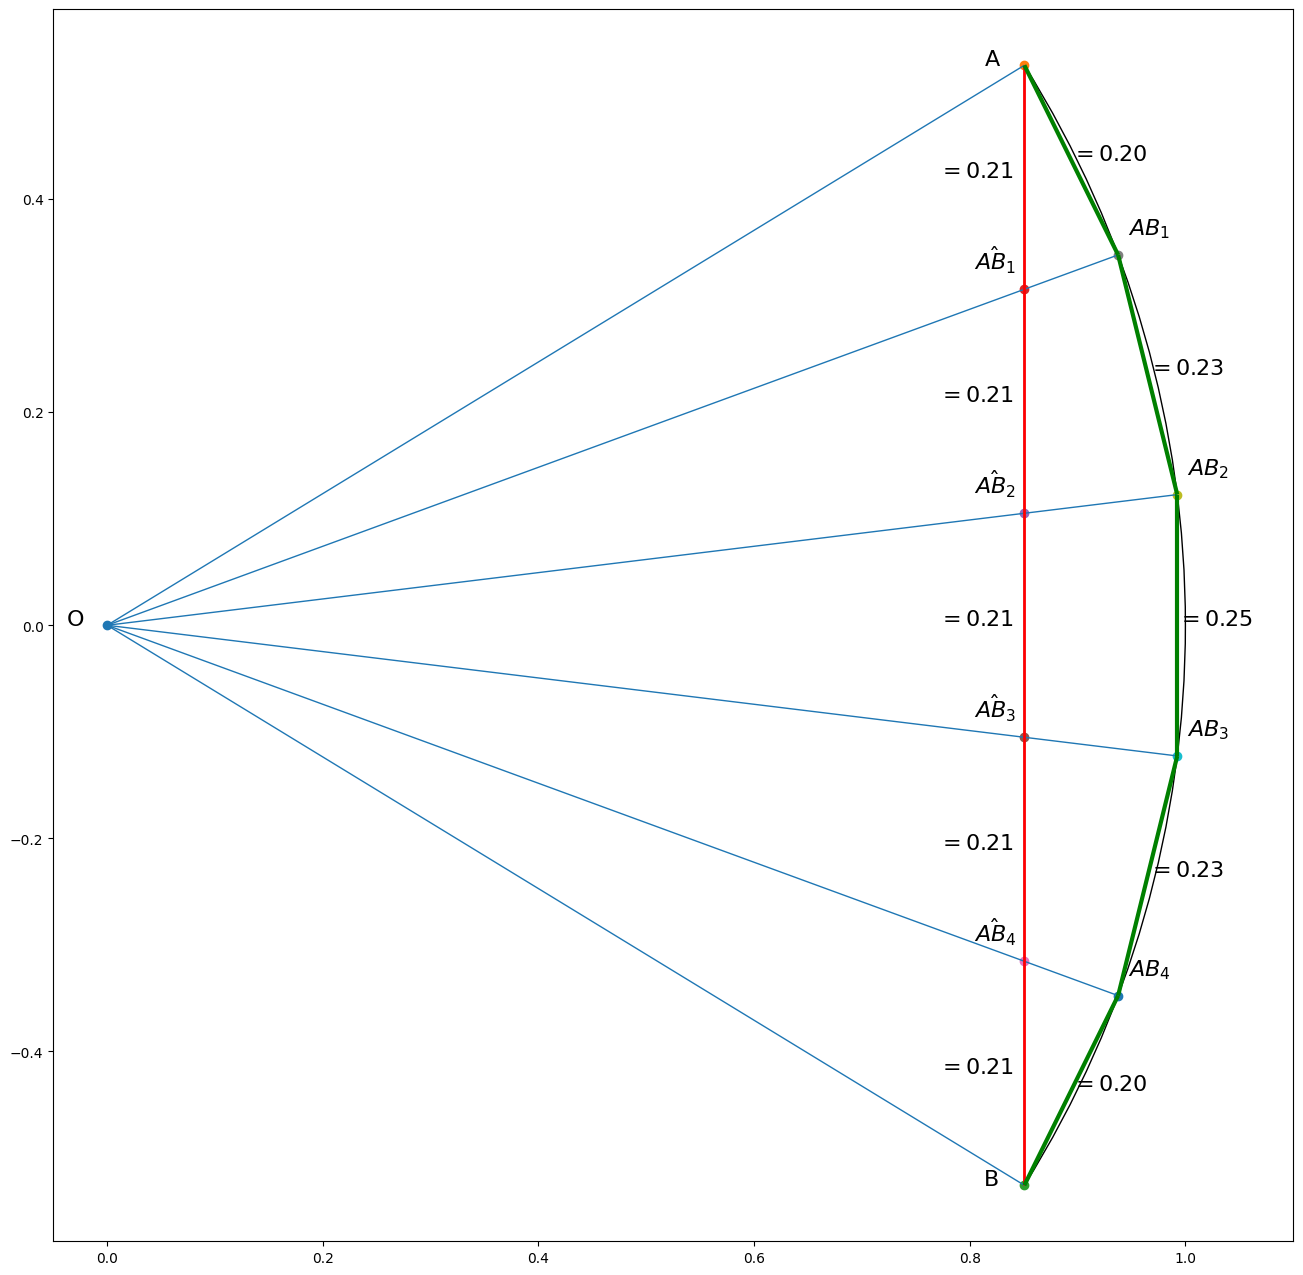

In [155]:
plt.figure(figsize=(16, 16))
ax = plt.gca()
print(A_theta,B_theta)

for p,l in [(O,"O"),(A,"A"),(B,"B")]:
    ax.scatter(*p)
    ax.annotate(l, p, fontsize=16, xytext=(-40, 0), textcoords='offset pixels')
for p,l in zip(hat_AB, [rf"$\hat{{AB}}_{i}$" for i in range(1,5)]):
    ax.scatter(*p)
    ax.annotate(l, p, fontsize=16, xytext=(-50, 20), textcoords='offset pixels')
for p,l in zip(AB, [rf"${{AB}}_{i}$" for i in range(1,5)]):
    ax.scatter(*p)
    ax.annotate(l, p, fontsize=16, xytext=(10, 20), textcoords='offset pixels')
arc_element = Arc((0, 0), 2, 2, theta1=B_theta, theta2=A_theta, linewidth=1, zorder=0,
                color="k")
annotate_distances(ax, new_points)
annotate_distances(ax,hat_new_points,offset=[-0.08,0])
# Add the court elements onto the axes
ax.add_patch(arc_element)
ax.add_collection(mc.LineCollection([[O,A],[O,B], [A,B]]+[[O,AB_i] for AB_i in AB],linewidths=1))
ax.add_collection(mc.LineCollection([[A,B]],colors="r",linewidths=2))

for i in range(new_points.shape[0]-1):
    ax.add_collection(mc.LineCollection([[new_points[i],new_points[i+1]]],colors="g", linewidths=3))
plt.xlim(-0.05, 1.1)
#plt.ylim(-0.8, 0.8)
plt.show()

In [112]:
np.linalg.norm(new_points[1:]-new_points[:-1],axis=-1)

array([0.19814743, 0.2315976 , 0.24534642, 0.2315976 , 0.19814743])

In [158]:
alphas = np.sin(np.arange(1,5)/5*omega)/np.sin(omega)
betas = np.sin((1-np.arange(1,5)/5)*omega)/np.sin(omega)
hat_AB = B[None,:]*alphas[:,None] + A[None,:]*betas[:,None]
AB = hat_AB / np.linalg.norm(hat_AB,axis=-1,keepdims=True)

31.717474411461005 -31.717474411461005


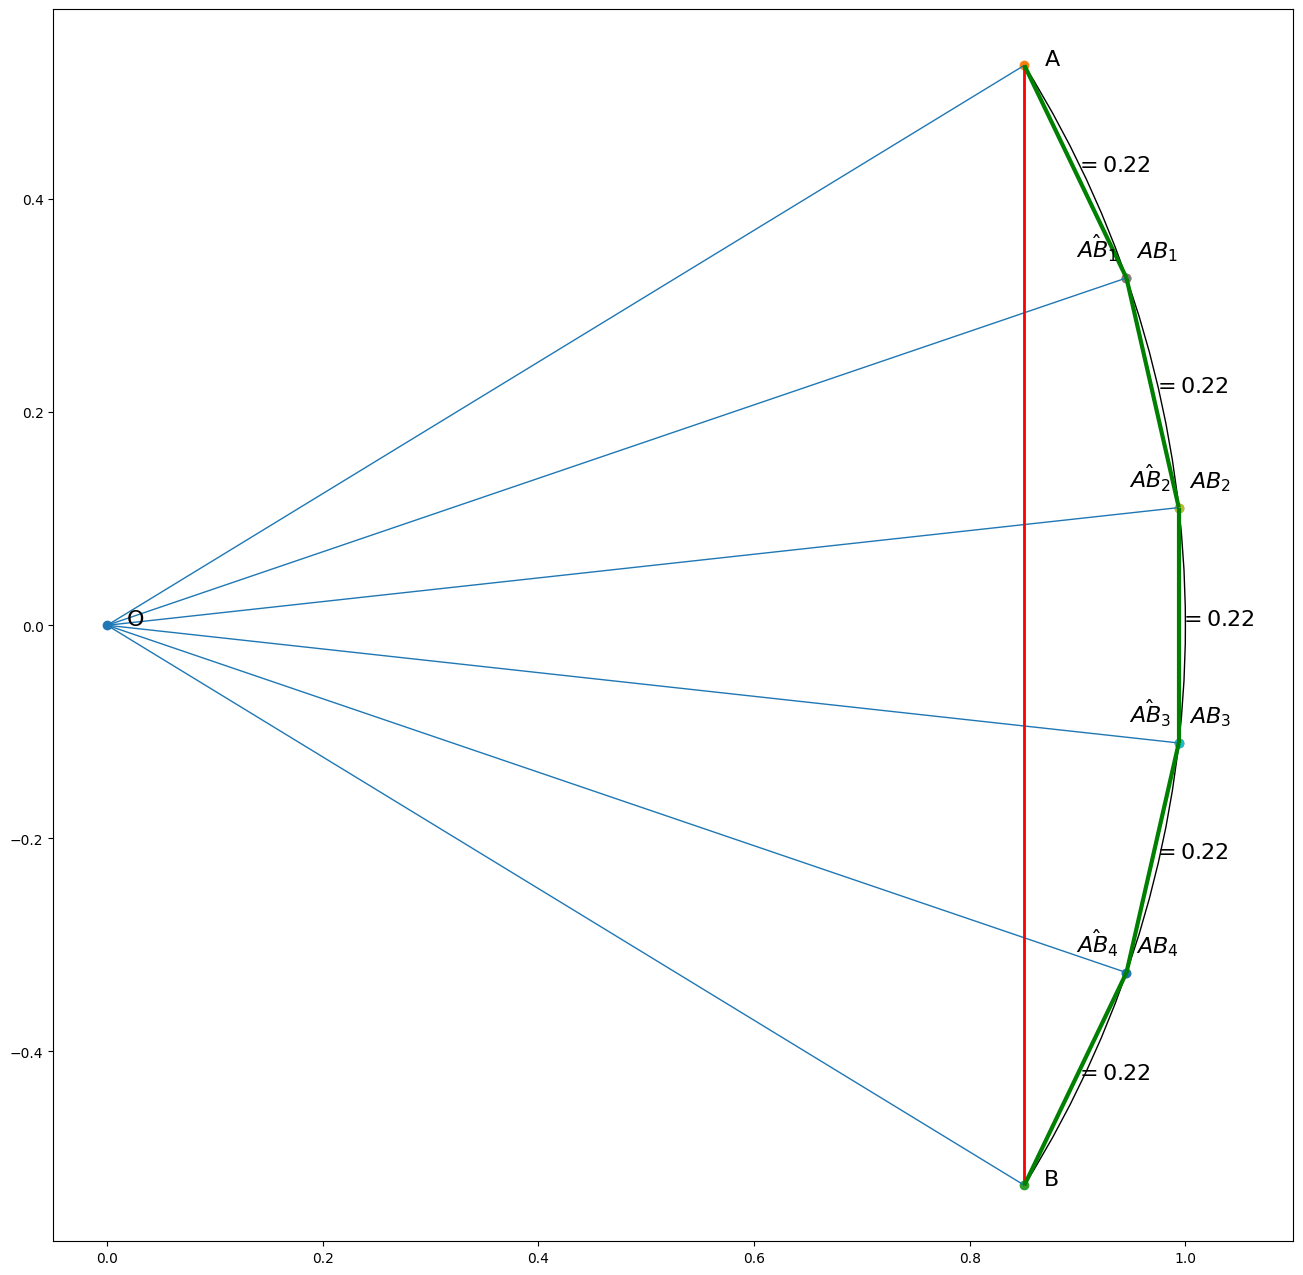

In [160]:
plt.figure(figsize=(16, 16))
ax = plt.gca()
print(A_theta,B_theta)

for p,l in [(O,"O"),(A,"A"),(B,"B")]:
    ax.scatter(*p)
    ax.annotate(l, p, fontsize=16, xytext=(20, 0), textcoords='offset pixels')
for p,l in zip(hat_AB, [rf"$\hat{{AB}}_{i}$" for i in range(1,5)]):
    ax.scatter(*p)
    ax.annotate(l, p, fontsize=16, xytext=(-50, 20), textcoords='offset pixels')
for p,l in zip(AB, [rf"${{AB}}_{i}$" for i in range(1,5)]):
    ax.scatter(*p)
    ax.annotate(l, p, fontsize=16, xytext=(10, 20), textcoords='offset pixels')
arc_element = Arc((0, 0), 2, 2, theta1=B_theta, theta2=A_theta, linewidth=1, zorder=0,
                color="k")
# Add the court elements onto the axese
ax.add_patch(arc_element)
ax.add_collection(mc.LineCollection([[O,A],[O,B], [A,B]]+[[O,AB_i] for AB_i in AB],linewidths=1))
ax.add_collection(mc.LineCollection([[A,B]],colors="r",linewidths=2))
new_points = np.r_[A[None,:],AB,B[None,:]]
annotate_distances(ax,new_points)
for i in range(new_points.shape[0]-1):
    ax.add_collection(mc.LineCollection([[new_points[i],new_points[i+1]]],colors="g", linewidths=3))
plt.xlim(-0.05, 1.1)
#plt.ylim(-0.8, 0.8)
plt.show()